# Project 5 - Building Functions and Visualizing Distribution

### Building Functions

This is key, as functions are reusable and repeatable.

In [1]:
def total(list_obj):
    total = 0
    for val in list_obj:
        total += val
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

Now let's create a function that gathers statistics for each variable in a dataframe.

In [2]:

def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

Lets test the functions we have just created.

In [3]:
lst = [2,8,4,5,3,9,5,4,6]

print("total:", total(lst))
print("mean:", mean(lst))
print("median:", median(lst))
print("mode:", mode(lst))
print("variance:", variance(lst, sample = False))
print("variance (sample):", variance(lst, sample = True))
print("sd:", SD(lst, sample = False))
print("sd (sample):", SD(lst, sample = True))

lst2 = [1,7,4,3,6,9,3,2,8]
print("correlation:", correlation(lst,lst2))
print("skewness:", skewness(lst, sample = False))
print("skewness (sample):", skewness(lst, sample = True))
print("kurtosis:", kurtosis(lst, sample = False))
print("kurtosis: (sample):", kurtosis(lst, sample = True))

total: 46
mean: 5.111111111111111
median: 5
mode: [4, 5]
variance: 4.5432098765432105
variance (sample): 5.111111111111112
sd: 2.1314806770278754
sd (sample): 2.2607766610417563
correlation: 0.7694010624058533
skewness: 0.4745402765565226
skewness (sample): 0.5752296814272971
kurtosis: 2.2371514650283557
kurtosis: (sample): -0.3101876856602761


# Creating a function that generates a datastructure with statistics for each column of data

In [4]:
import pandas as pd
def gather_statistics(df, sample = True):
    # We will create a dictionary of dictionaries with an entry for each column of data in a dataframe, df
    dct = {key:{} for key in df}
    # Call each column of data and its name (key) df.items() makes a list of tuples where tuple index 0 refers to the key, index 1 refers to object pointed to by key
    for key, val in df.items():
        # inplace = True alters the object itself
        val.dropna(axis=0, inplace = True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df
           

For the next exercise, you will need to install pandas_datareader using:

>  pip install pandas-datareader

If you are not an administrator, you may use the command

>  pip install pandas-datareader --user

In [5]:
!pip install pandas-datareader

Now that I have built my statistical functions, I will import daily stock data using pandas_datareader. I will import some of the major tech stocks.

In [6]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-11-01 11:31:13.305545


In [7]:
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [8]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-10-26,1094.939941,1001.440002,1024.689941,1018.429993,62415000.0,1018.429993
2021-10-27,1070.880005,1030.780029,1039.660034,1037.859985,38526500.0,1037.859985
2021-10-28,1081.000000,1054.199951,1068.310059,1077.040039,27213200.0,1077.040039


In [9]:
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

In [10]:
data_dict.values()

dict_values([                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
...                ...         ...         ...         ...         ...   
2021-10-26  312.399994  308.600006  311.000000  310.109985  28107300.0   
2021-10-27  326.100006  316.000000  316.000000  323.170013  52588700.0   
2021-10-28  324.869995  321.359985  324.329987  324.350006  26297900.0   
2021-10-29  332.000000  323.899994  324.130005  331.619995  34744900.0   
2021-11-01  331.489990  326.369995  331.355011  328.640015  13986355.0   

             Adj Close  

In [11]:
for val in data_dict.values():
    print(val["Close"])

Date
2012-01-03     26.770000
2012-01-04     27.400000
2012-01-05     27.680000
2012-01-06     28.110001
2012-01-09     27.740000
                 ...    
2021-10-26    310.109985
2021-10-27    323.170013
2021-10-28    324.350006
2021-10-29    331.619995
2021-11-01    328.640015
Name: Close, Length: 2475, dtype: float64
Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2021-10-26    149.320007
2021-10-27    148.850006
2021-10-28    152.570007
2021-10-29    149.800003
2021-11-01    148.815002
Name: Close, Length: 2475, dtype: float64
Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2021-10-26    315.809998
2021-10-27    312.220001
2021-10-28    316.920013
2021-10-29    323.570007
2021-11-01    332.024994
Name: Close, Length: 2380, dtype: float64
Date
2012-01-03       5.616000
201

In [12]:
close_data = pd.concat((df["Close"] for df in data_dict.values()),
                      keys = data_dict.keys(),
                       axis = 1)
# Can use val in place of df in close_data if you want

close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765714,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2021-10-26,310.109985,149.320007,315.809998,1018.429993
2021-10-27,323.170013,148.850006,312.220001,1037.859985
2021-10-28,324.350006,152.570007,316.920013,1077.040039


 ## Pandas has a built in matplotlib extension

Now let's plot the data for each stock in a single graph.

Text(0.5, 1.0, 'Daily Stock Prices at Close')

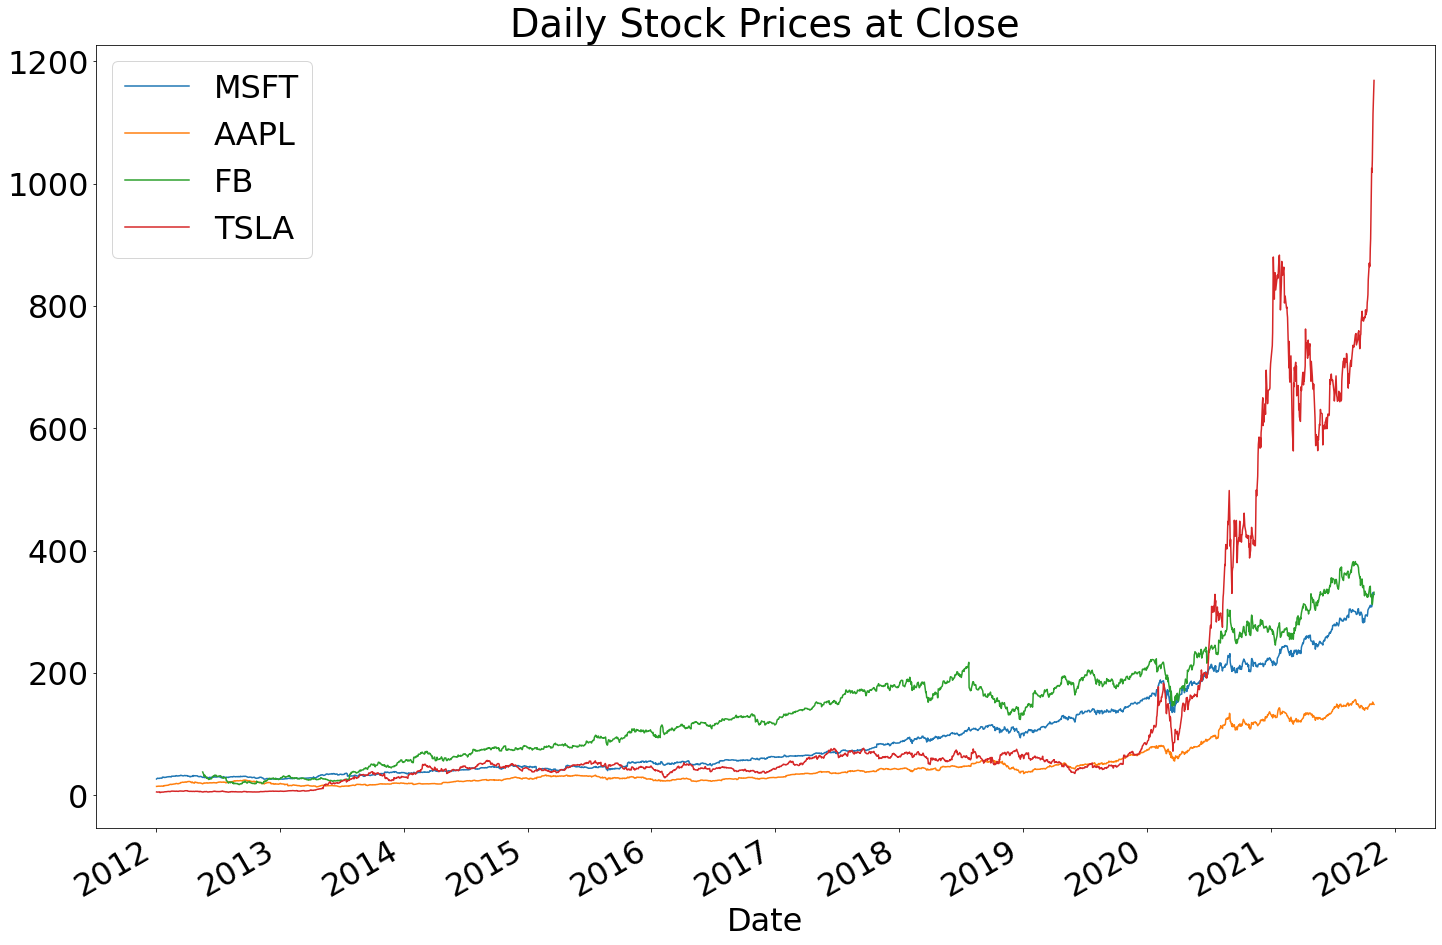

In [13]:
import matplotlib.pyplot as plt

# Let's set a default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Stock Prices at Close")

#### It is helpful to log the y-axis to view change in terms of proportion

<ipython-input-14-57d789a3dc74>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000'),
 Text(0, 100000.0, '100000')]

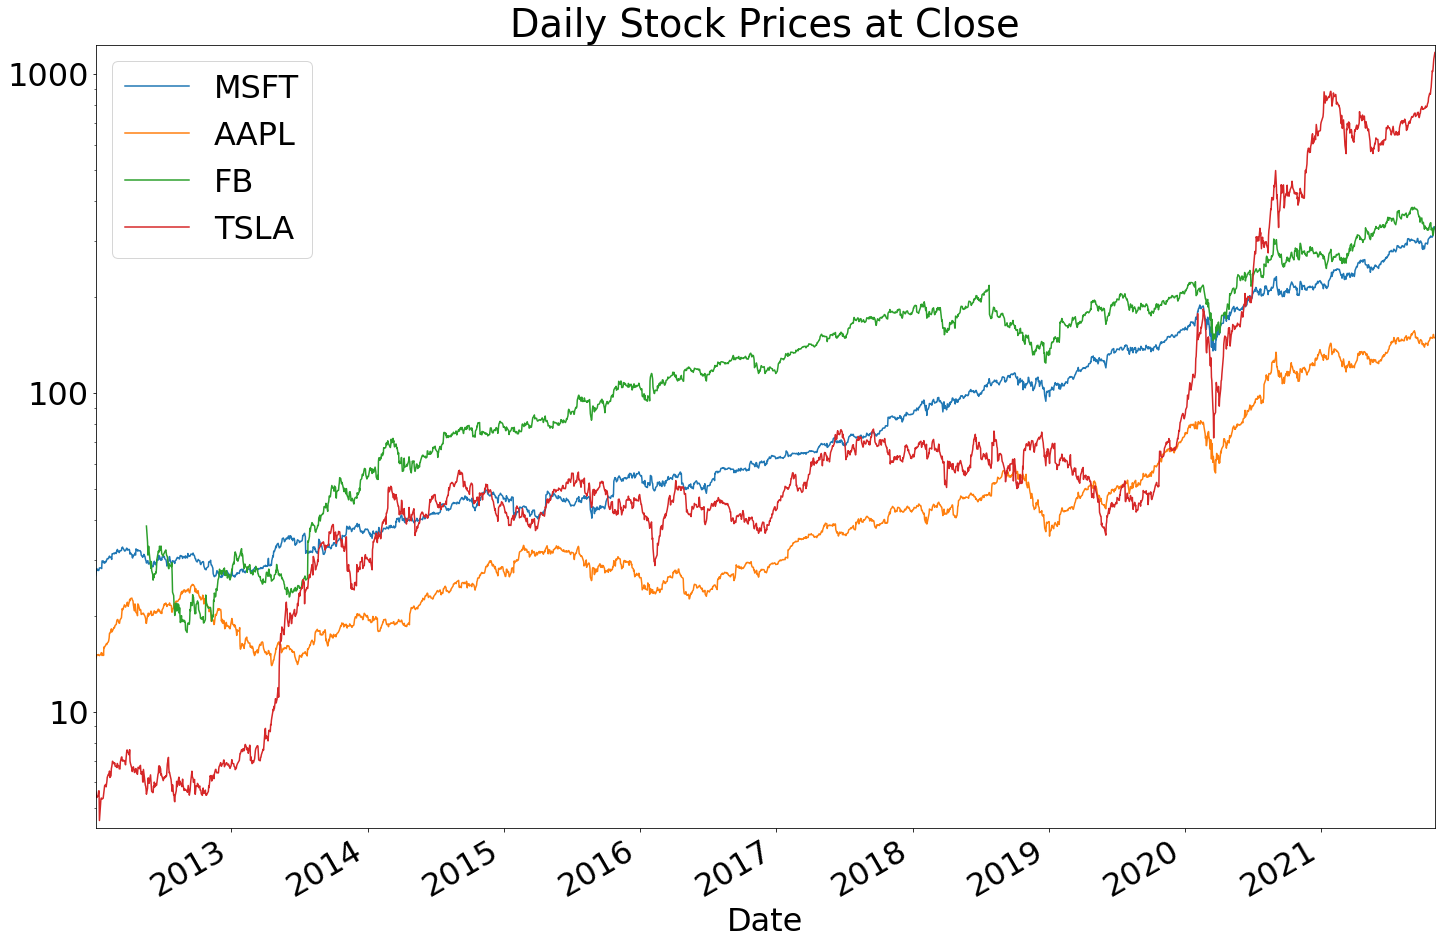

In [14]:
import matplotlib.pyplot as plt

# Let's set a default font size
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01  
# .xmargin & .ymargin removes the extra white space on all sides of the graph

fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Stock Prices at Close")
ax.set_yscale("log")
# Let's change our y-axis labels so they are not in scientific notation
# reset ytickslabels so that they are not in scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])

# Tranforming Data

Similar to logging data, we can view the daily precent change of each stock to make further observations.

In [15]:
price_change_data = close_data.pct_change() * 100
price_change_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537408,NaN,-1.317670
2012-01-05,1.021900,1.110200,NaN,-2.129196
2012-01-06,1.553469,1.045381,NaN,-0.774333
2012-01-09,-1.316261,-0.158618,NaN,1.263468
...,...,...,...,...
2021-10-26,0.642580,0.457487,-3.918587,-0.627402
2021-10-27,4.211418,-0.314761,-1.136758,1.907838
2021-10-28,0.365131,2.499161,1.505353,3.775081


<ipython-input-16-67fd3941e78c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels((str(int(y)) + "%" for y in y_vals))


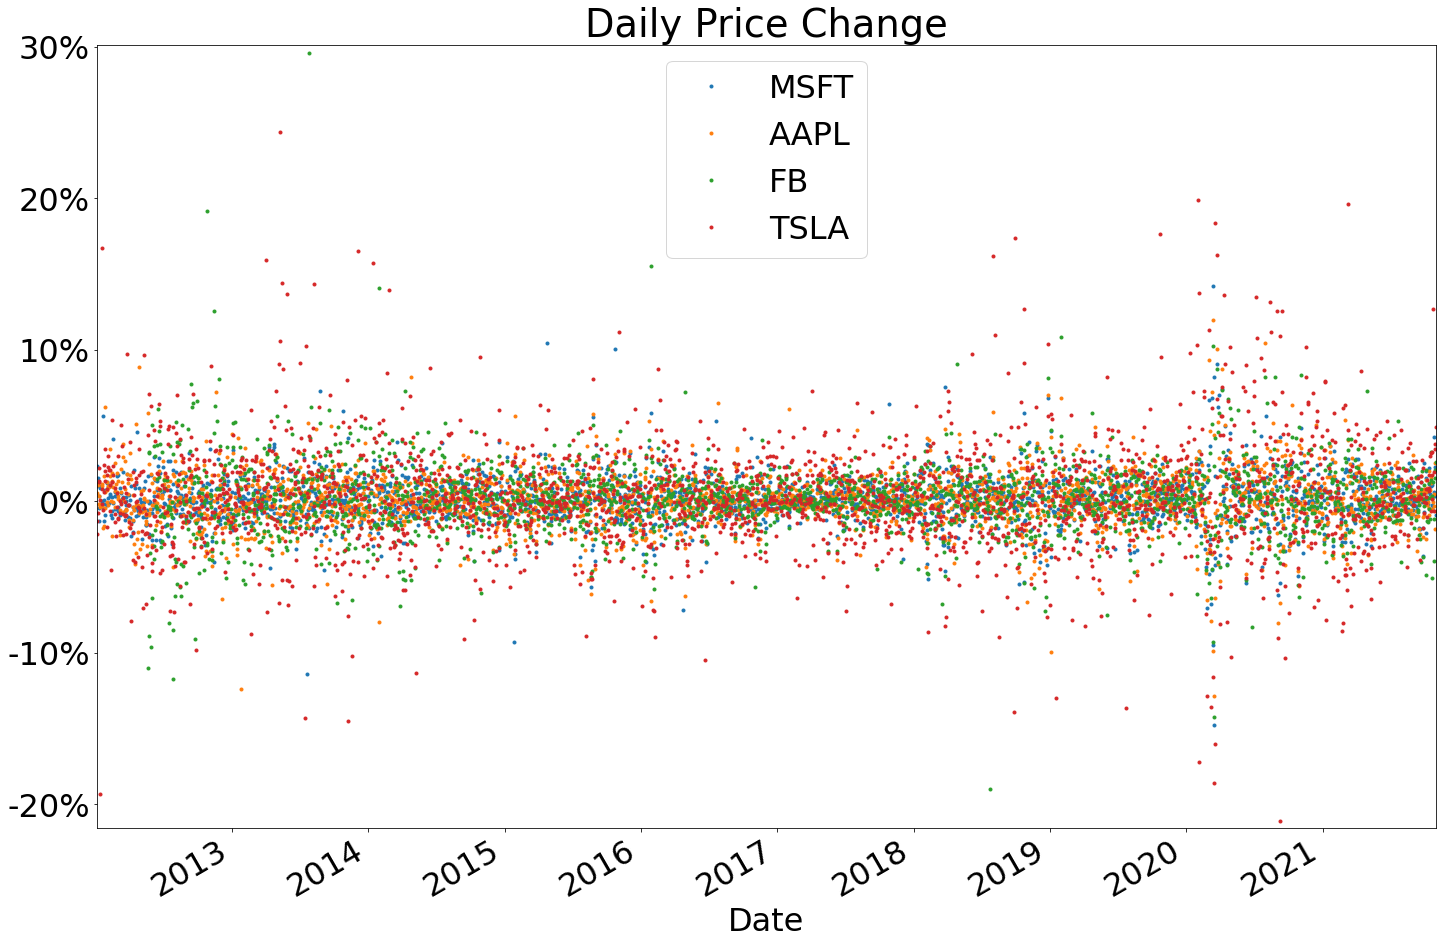

In [16]:
plt.rcParams.update({'font.size':32})
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].plot.line(ls = " ", marker = ".",
                                     ax = ax, legend = True)
    
y_vals = ax.get_yticks()
ax.set_yticklabels((str(int(y)) + "%" for y in y_vals))
plt.title("Daily Price Change")
plt.show()
plt.close()

In [17]:
stats_df = gather_statistics(price_change_data,
                             sample = True)
stats_df

,MSFT,AAPL,FB,TSLA
mean,0.114,0.110,0.117,0.277
median,0.070,0.083,0.106,0.145
variance,2.592,3.202,5.371,12.248
S.D.,1.610,1.789,2.317,3.500
skewness,0.046,-0.121,0.931,0.437
kurtosis,10.703,6.462,18.458,6.247


<ipython-input-18-8492af6fc733>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


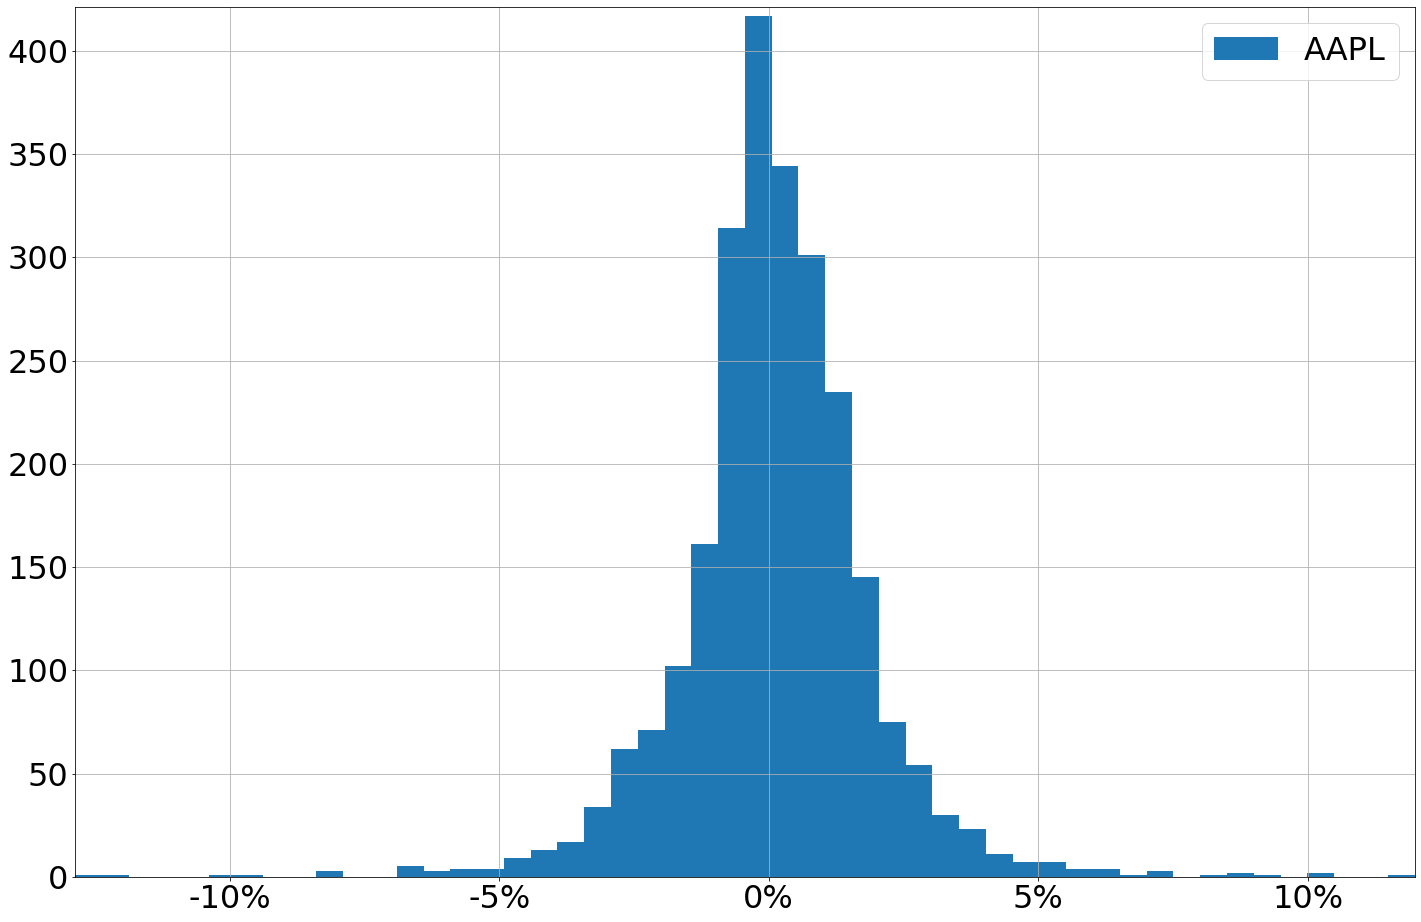

In [18]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")

# Lets horizontal axis values as percentages
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()
plt.show()

<ipython-input-19-ba7c7748bc66>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-19-ba7c7748bc66>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


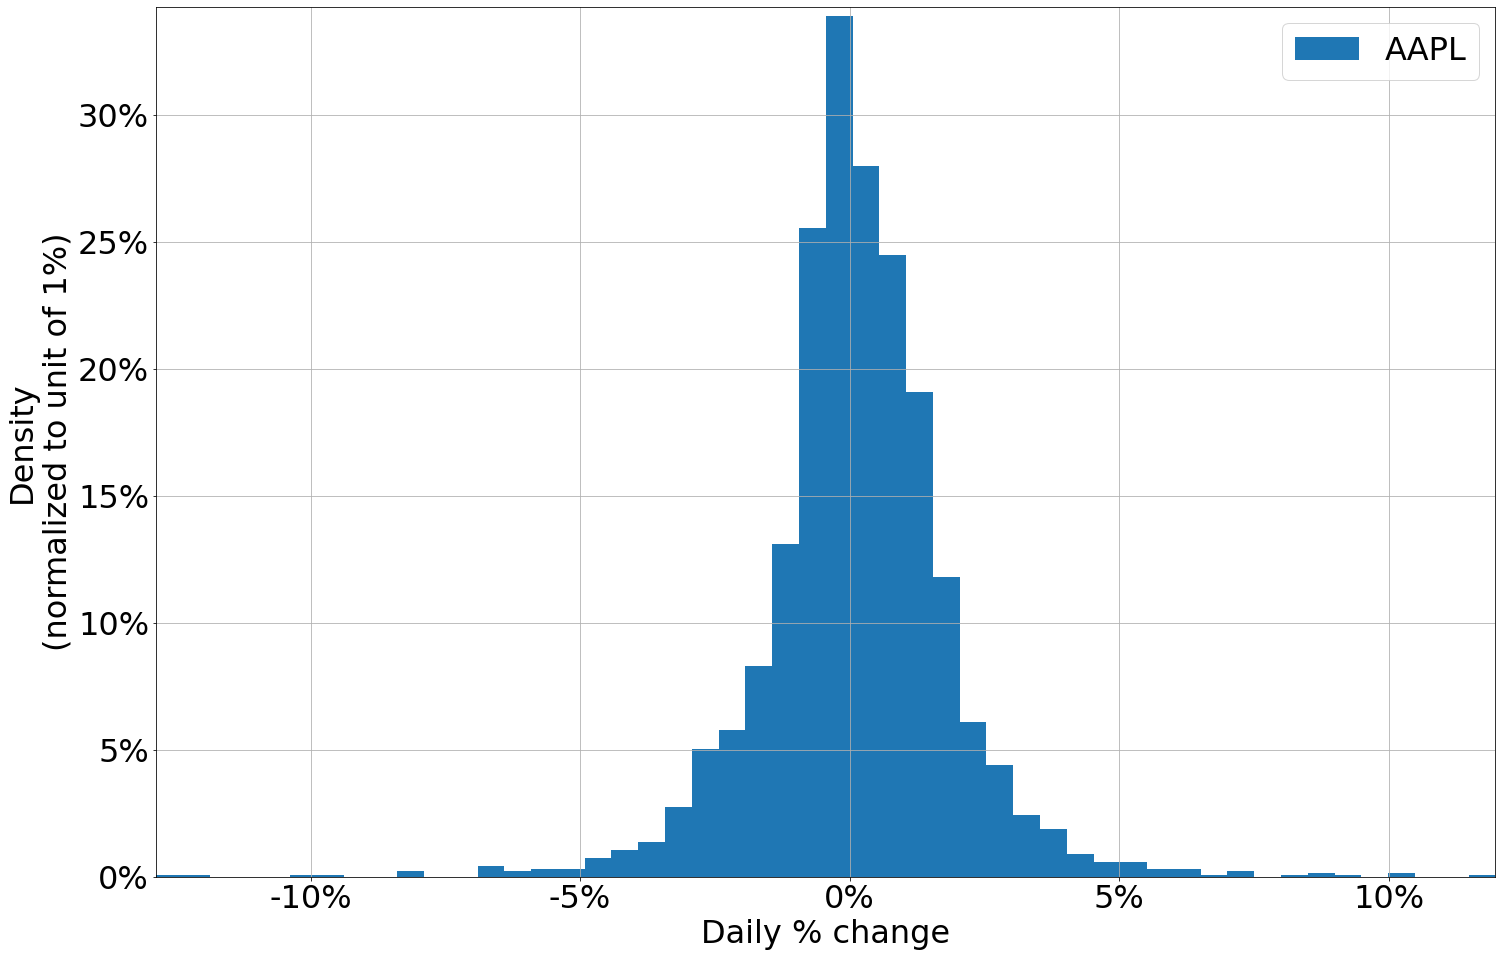

In [19]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50,
                               density = True,
                               label = "AAPL")


x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
ax.set_xlabel("Daily % change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
ax.set_ylabel("Density\n(normalized to unit of 1%)")

plt.legend()
plt.show()

array([<AxesSubplot:title={'center':'MSFT'}>,
       <AxesSubplot:title={'center':'AAPL'}>,
       <AxesSubplot:title={'center':'FB'}>,
       <AxesSubplot:title={'center':'TSLA'}>], dtype=object)

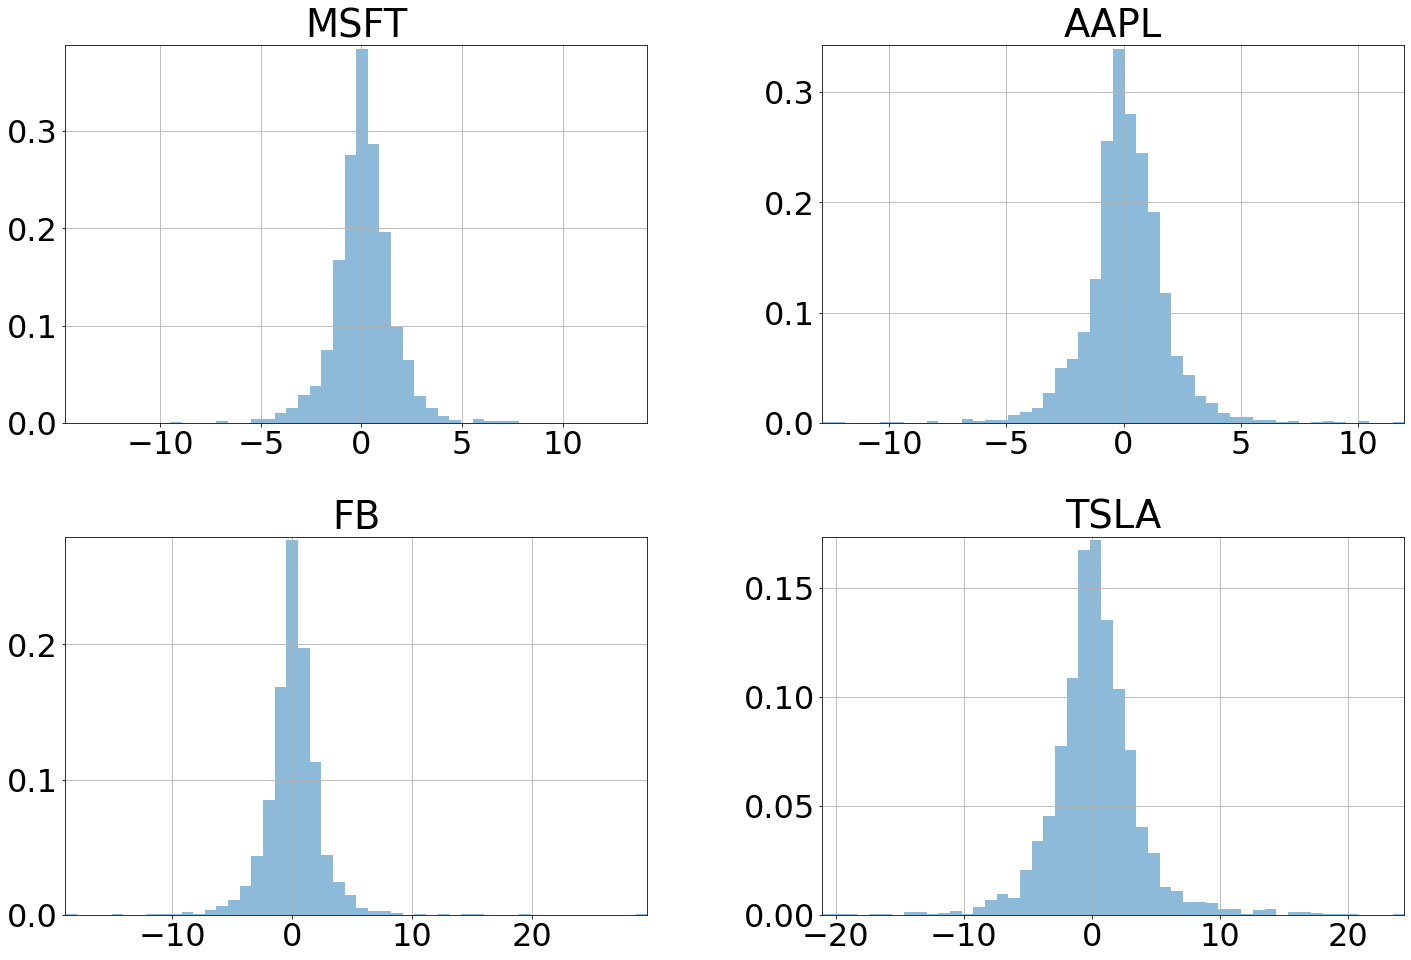

In [20]:
fig, ax = plt.subplots(2,2, figsize =(24,16))
price_change_data.hist(bins = 50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)

## Transform axis tick labels

<ipython-input-21-bae85e15750c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+"%" for x in x_vals])
<ipython-input-21-bae85e15750c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


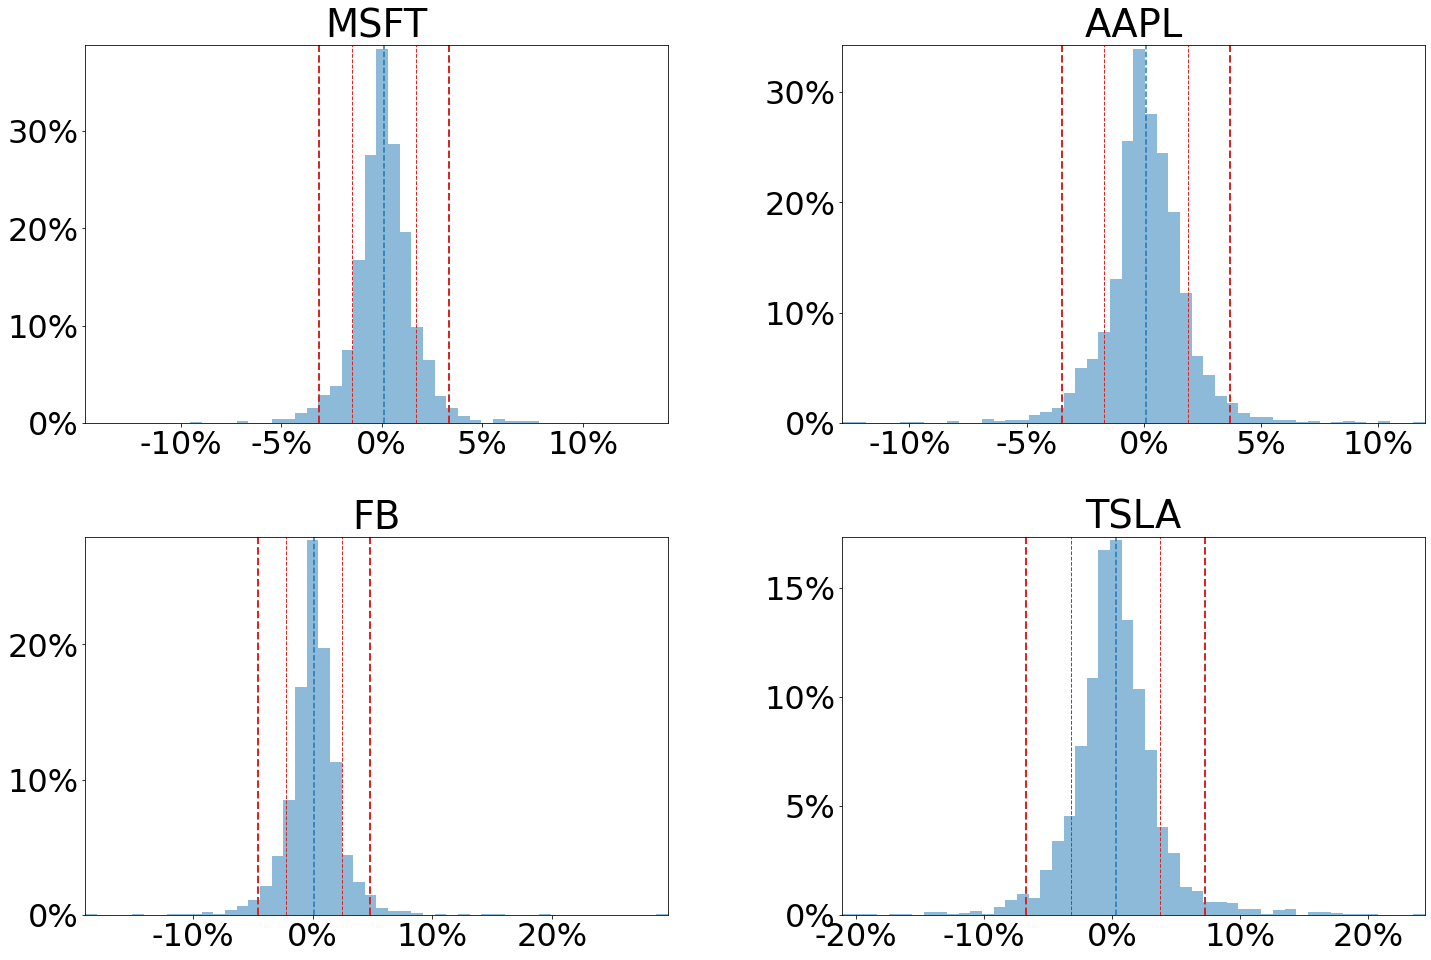

In [21]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins =50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax[i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+"%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)
        hist_data = stats_df[stock]
        a.axvline(x = hist_data.loc["mean"], ls="--")
        num_SDs = 2
        for num in range(1,num_SDs+1):
            a.axvline(x = hist_data.loc["mean"]+hist_data.loc["S.D."] *num ,
                      color = "C3",
                      ls="--",
                     lw = num)
            a.axvline(x = hist_data.loc["mean"]-hist_data.loc["S.D."] *num, 
                      ls="--",
                     color = "C3",
                     lw = num)
                      

<ipython-input-22-d65355694a27>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+"%" for x in x_vals])
<ipython-input-22-d65355694a27>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


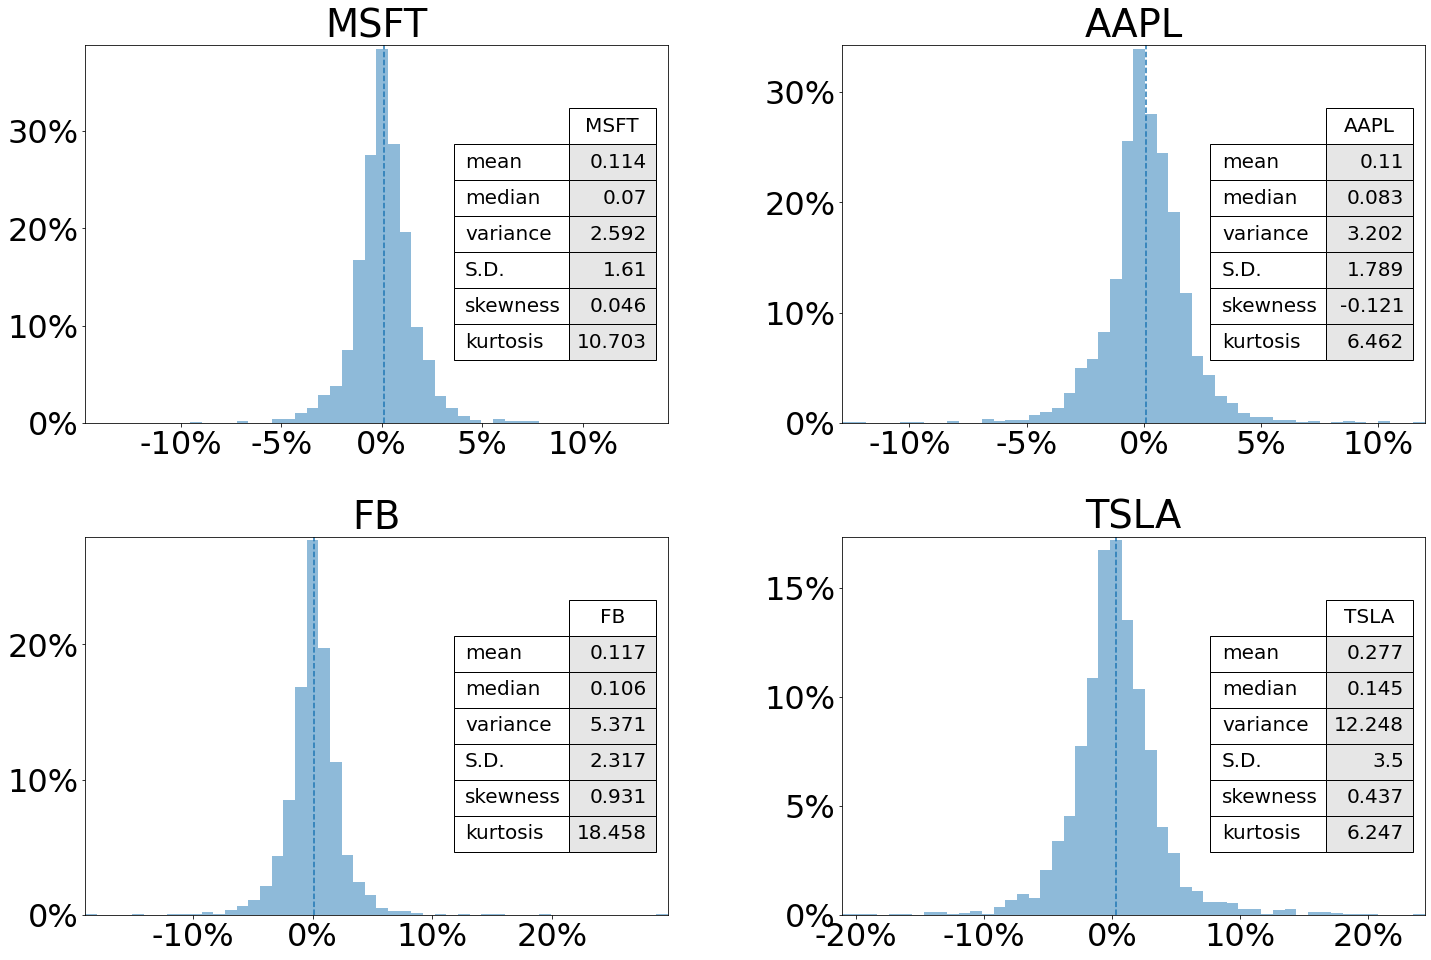

In [22]:
from pandas.plotting import table
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins =50,
                      alpha = .5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax[i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+"%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        a.grid(False)
        hist_data = stats_df[stock]
        a.axvline(x = hist_data.loc["mean"], ls="--")

        
        stats_table = table(a, 
                      hist_data,
                     colWidths=[.1],
                     cellColours=[[(.9,.9,.9)]]*6,
                     loc = "center right")
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)

## We can also plot the distributions all on the same graph

This will make visual comparisons easy

<ipython-input-23-586848f3b57d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-23-586848f3b57d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


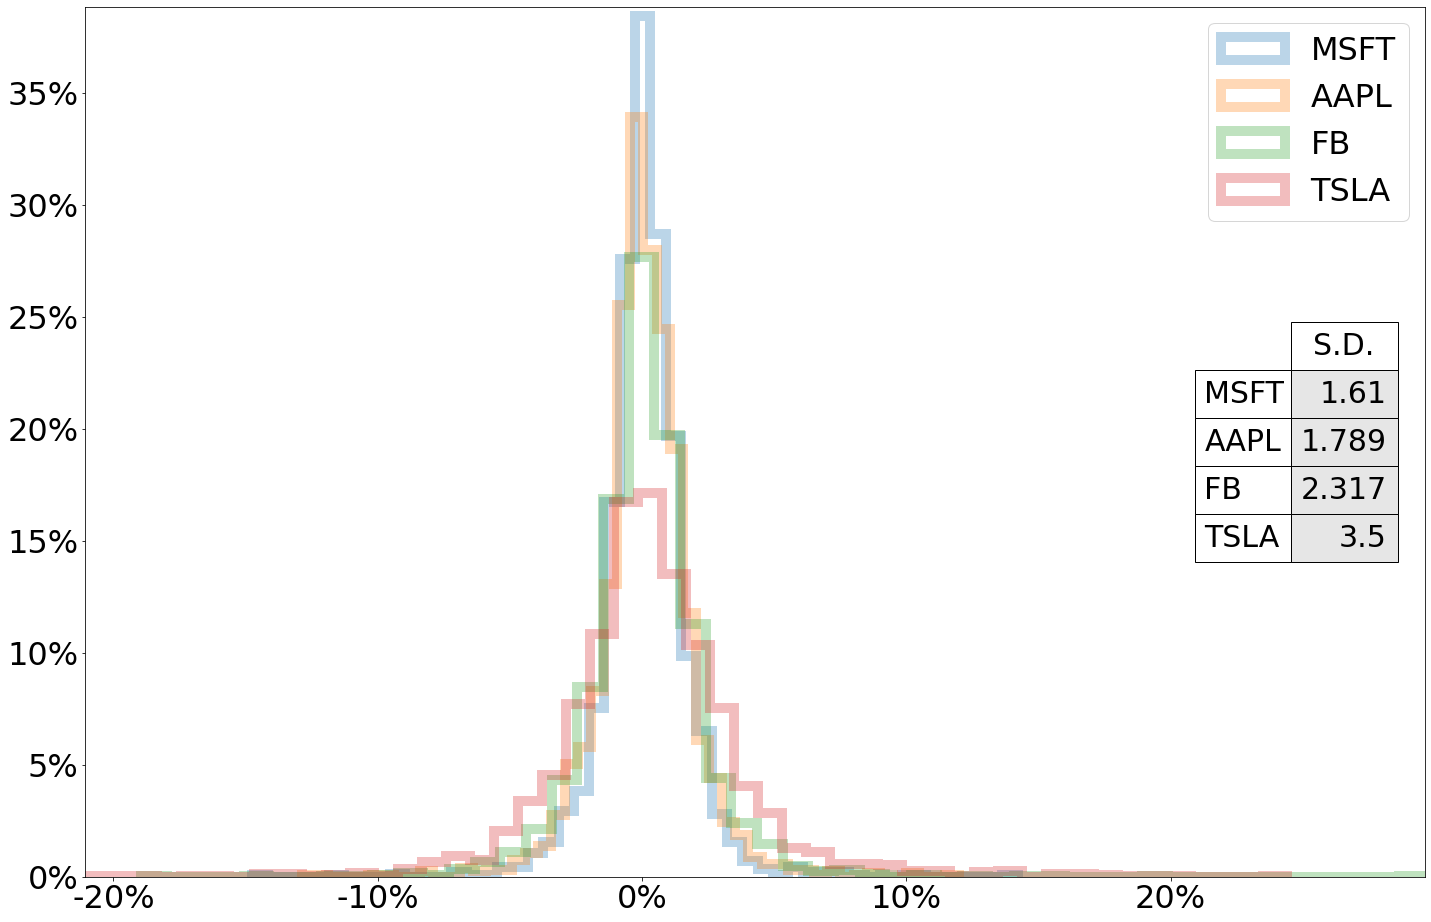

In [23]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

<ipython-input-24-4d9cd2a2fa24>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-24-4d9cd2a2fa24>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


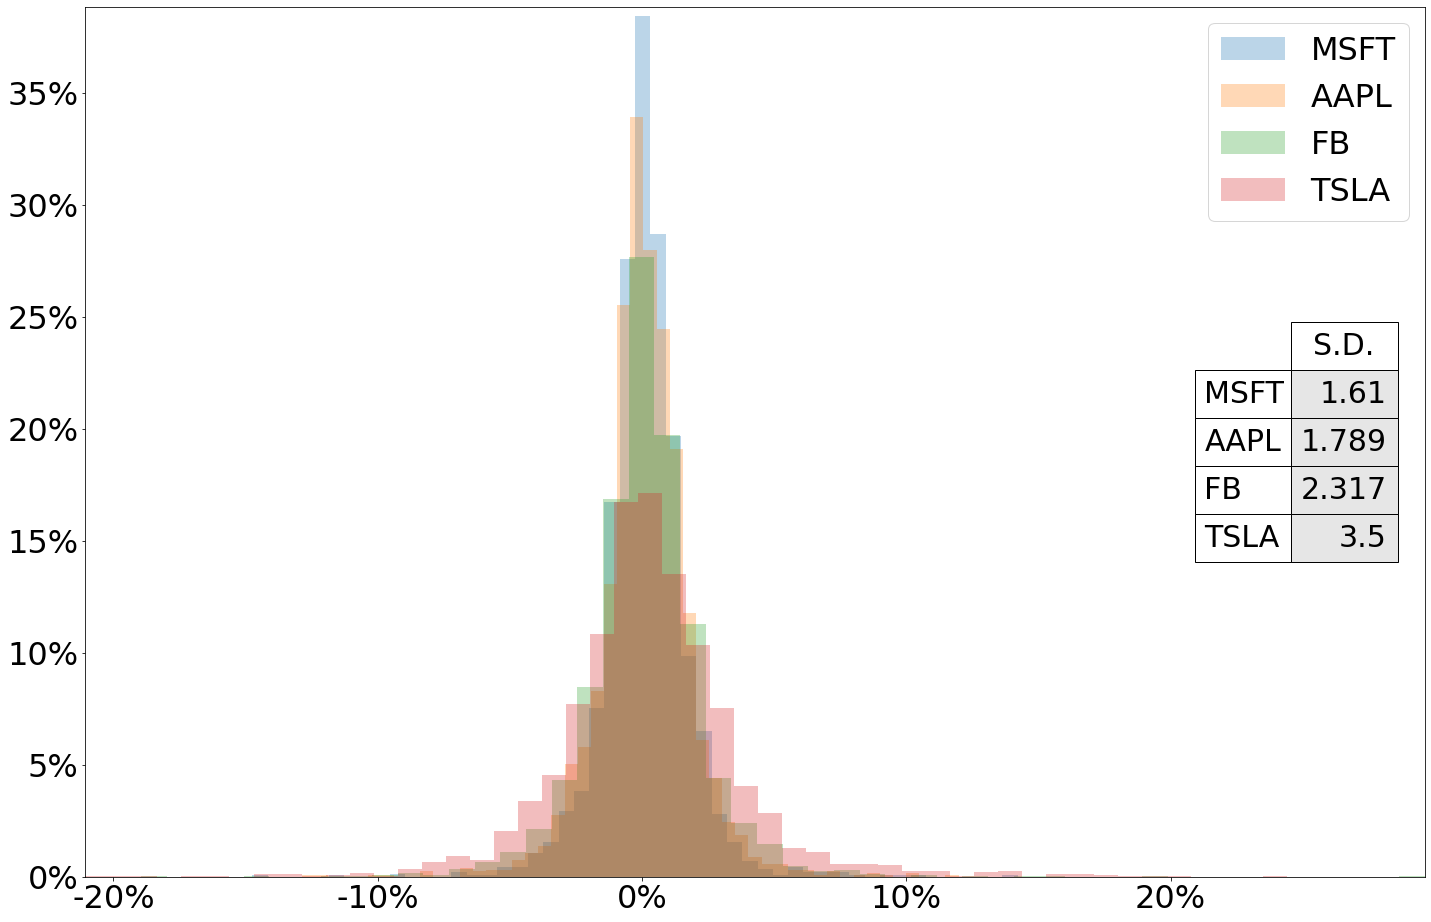

In [24]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

End of project 5